# Elements of Statistics and Econometrics

## Assignment 2

# Task 1

1. We start with the verification of the law of large numbers.<br> Thus we check if an estimator converges (in probability) to its true value if the sample size increases.

(a) Simulate samples of size n = 100, . . . , 100000 (with step say 1000) from a normal distribution with mean 1 and variance 1, i.e. N(1,1). For each sample esti- mate the mean, the variance. Plot the path of sample means as function of n. What conclusion can we draw from the figure if we keep in mind the law of large numbers?

In [1]:
import numpy as np
import pandas as pd

In [2]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
np.random.seed(1)

mu, sigma = 1, 1 # mean and standard deviation


list_of_n = [i*100 for i in range(1,10)]
list_of_n.extend([i*1000 for i in range(1,10)])
list_of_n.extend([i*10000 for i in range(1,11)])

samples = [np.random.normal(mu, sigma, n) for n in list_of_n]

means = [sample.mean() for sample in samples]
variances = [sample.var() for sample in samples]

In [4]:
data = pd.DataFrame({'n':list_of_n, 'mean':means, 'variance':variances})
data.transpose()

0           1           2           3           4   \
n         100.000000  200.000000  300.000000  400.000000  500.000000   
mean        1.060583    1.081308    1.056525    0.998838    1.077792   
variance    0.783502    0.944366    1.101057    0.909217    1.044598   

                  5           6           7           8            9   ...  \
n         600.000000  700.000000  800.000000  900.000000  1000.000000  ...   
mean        0.970999    0.992353    0.978183    1.039233     1.039994  ...   
variance    1.038588    0.989222    0.991245    1.050401     0.981413  ...   

                    18            19            20            21  \
n         10000.000000  20000.000000  30000.000000  40000.000000   
mean          1.008989      0.995566      1.008098      1.004134   
variance      1.002491      0.987712      0.990630      0.992373   

                    22            23            24            25  \
n         50000.000000  60000.000000  70000.000000  80000.000000   
mean          1.006567      0.996302      1.001276      0.996114   
variance      0.995342      1.011350      0.995964      1.004918   

                    26             27  
n         90000.000000  100000.000000  
mean          1.000918       1.004501  
variance      0.994484       0.997333  

[3 rows x 28 columns]

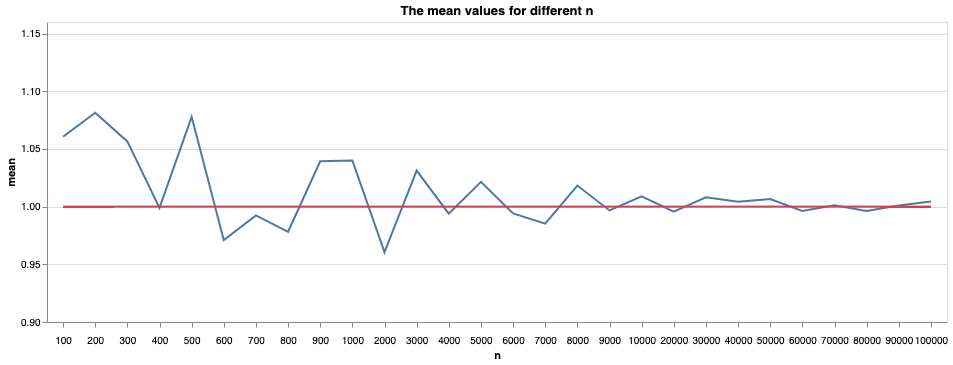

In [5]:
data['1 value'] = [1]*len(list_of_n) 

line = alt.Chart(data).mark_line().encode(
    x=alt.X('n:O', ),
    y=alt.Y('mean:Q',title ="mean", scale = alt.Scale(domain=[0.9,1.15])),
    tooltip = alt.Tooltip(['n:O', 'mean:Q'])
    
)

line2 = alt.Chart(data).mark_line(color='#d53e4f').encode(
    x=alt.X('n:O', ),
    y=alt.Y('1 value:Q',title ="", scale = alt.Scale(domain=[0.9,1.15]))
)

alt.layer(line + line2).configure_axisX(
    labelAngle=0,
    labelPadding=8
).properties(width=900, title="The mean values for different n")

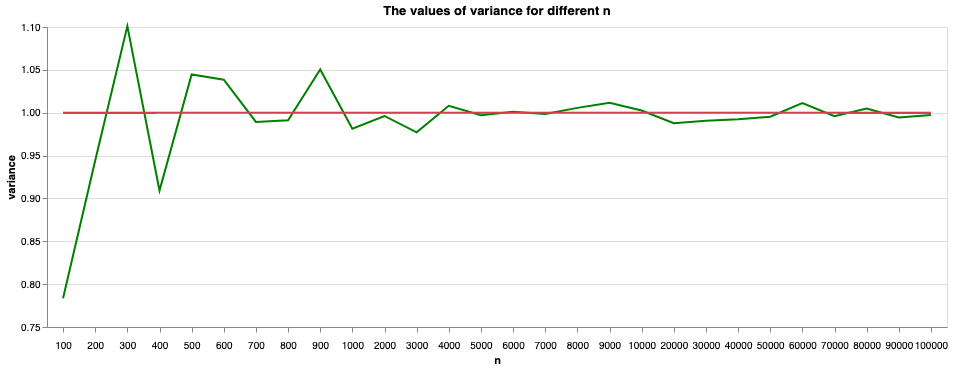

In [6]:
line = alt.Chart(data).mark_line(color="green").encode(
    x=alt.X('n:O', ),
    y=alt.Y('variance:Q',title ="variance", scale = alt.Scale(domain=[0.75,1.1])),
    tooltip = alt.Tooltip(['n:O', 'mean:Q'])
    
)

line2 = alt.Chart(data).mark_line(color='#d53e4f').encode(
    x=alt.X('n:O', ),
    y=alt.Y('1 value:Q',title ="", scale = alt.Scale( domain=[0.75,1.1]))
)

alt.layer(line + line2).configure_axisX(
    labelAngle=0,
    labelPadding=8
).properties(width=900, title="The values of variance for different n")

<b>Law of large numbers</b> 

$\lim_{n\to\infty}P(|\bar{X}-\mu|\geq c) = 0$

As we can see on plots - estimated means goes to theoratical mean with increasing n

The same situation is for variances - estimated variances goes to theoratical variance with increasing n

(b) Frequently if is difficult to obtain more data. How many observations do we need in order to obtain an estimator which is close enough (±0.01) to the true value?

The exact Confidence Interval for $\mu$ at the level $1-\alpha$:

$$ \left[ \bar{X} - z_{1- \frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}, \bar{X} + z_{1- \frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}} \right] $$

So we want that difference from mean value should be 0.01

$$z_{1- \frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}=0.01 \Rightarrow ~~ n = (100*\sigma*z_{1- \frac{\alpha}{2}})^2$$

If $\alpha=0.05 \Rightarrow 1-\frac{\alpha}{2}=0.975$

In [7]:
import scipy.stats

Z_1_alfa2 = scipy.stats.norm.ppf(0.975)
Z_1_alfa2

1.959963984540054

$z_{1-\frac{\alpha}{2}} \approx 1.96,~~ \sigma=1$

In [8]:
np.power(100*1*Z_1_alfa2,2)

38414.58820694125

$\Rightarrow$ We should have at least <b>38415</b> observations in order to obtain an estimator which is close enough (±0.01)

(c) Add to the plot the 95% confidence intervals. Do it ones with known $σ$ and ones with an estimated. The confidence intervals have to be constructed manually. Provide their interpretation.

In [9]:
#Calculating confidence margin for each n
confidence_dif = []

for i in range(len(list_of_n)):
    var = variances[i]
    n = list_of_n[i]
    dif = Z_1_alfa2*np.sqrt(var/n)
    confidence_dif.append(dif)

Let "confidence_mean_upper" values - $\bar{X_i}+z_{1- \frac{\alpha}{2}}\frac{\sigma}{\sqrt{n_i}}$ 
$~~~~~~$"confidence_mean_lower" values - $\bar{X_i}-z_{1- \frac{\alpha}{2}}\frac{\sigma}{\sqrt{n_i}}$ 

In [10]:
data['confidence_dif'] = confidence_dif
data['confidence_mean_upper'] = data['mean'] + data['confidence_dif']
data['confidence_mean_lower'] = data['mean'] - data['confidence_dif']

In [11]:
data[['n','mean', 'confidence_mean_upper', 'confidence_mean_lower', 'confidence_dif']].transpose()

0           1           2           3   \
n                      100.000000  200.000000  300.000000  400.000000   
mean                     1.060583    1.081308    1.056525    0.998838   
confidence_mean_upper    1.234070    1.215988    1.175264    1.092282   
confidence_mean_lower    0.887095    0.946628    0.937786    0.905394   
confidence_dif           0.173487    0.134680    0.118739    0.093444   

                               4           5           6           7   \
n                      500.000000  600.000000  700.000000  800.000000   
mean                     1.077792    0.970999    0.992353    0.978183   
confidence_mean_upper    1.167377    1.052543    1.066032    1.047175   
confidence_mean_lower    0.988206    0.889455    0.918673    0.909192   
confidence_dif           0.089585    0.081544    0.073679    0.068991   

                               8            9   ...            18  \
n                      900.000000  1000.000000  ...  10000.000000   
mean                     1.039233     1.039994  ...      1.008989   
confidence_mean_upper    1.106192     1.101395  ...      1.028613   
confidence_mean_lower    0.972275     0.978594  ...      0.989365   
confidence_dif           0.066958     0.061401  ...      0.019624   

                                 19            20            21            22  \
n                      20000.000000  30000.000000  40000.000000  50000.000000   
mean                       0.995566      1.008098      1.004134      1.006567   
confidence_mean_upper      1.009340      1.019361      1.013897      1.015312   
confidence_mean_lower      0.981793      0.996835      0.994372      0.997822   
confidence_dif             0.013774      0.011263      0.009762      0.008745   

                                 23            24            25            26  \
n                      60000.000000  70000.000000  80000.000000  90000.000000   
mean                       0.996302      1.001276      0.996114      1.000918   
confidence_mean_upper      1.004349      1.008669      1.003061      1.007433   
confidence_mean_lower      0.988255      0.993883      0.989168      0.994402   
confidence_dif             0.008047      0.007393      0.006947      0.006515   

                                  27  
n                      100000.000000  
mean                        1.004501  
confidence_mean_upper       1.010691  
confidence_mean_lower       0.998311  
confidence_dif              0.006190  

[5 rows x 28 columns]

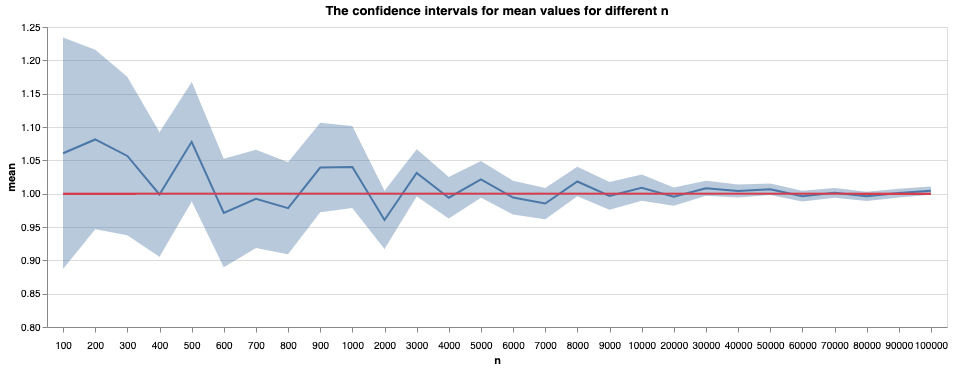

In [12]:
line = alt.Chart(data).mark_line().encode(
    x=alt.X('n:O', ),
    y=alt.Y('mean:Q',title ="mean", scale = alt.Scale(domain=[0.8,1.05])),
    tooltip = alt.Tooltip(['n:O', 'mean:Q'])
    
)

line2 = alt.Chart(data).mark_line(color='#d53e4f').encode(
    x=alt.X('n:O', ),
    y=alt.Y('1 value:Q',title ="", scale = alt.Scale(domain=[0.8,1.05]))
)

confidence = alt.Chart(data).mark_area(opacity=0.4).encode(
    x=alt.X('n:O', ),
    y=alt.Y('confidence_mean_upper:Q', scale = alt.Scale(domain=[0.8,1.25])),
    y2=alt.Y2('confidence_mean_lower:Q')
)

alt.layer(confidence + line + line2).configure_axisX(
    labelAngle=0,
    labelPadding=8
).properties(width=900, title="The confidence intervals for mean values for different n")

As we can see, the bigger n - the narrower the confidence interval

(d) Next plot the sample variance as a function of n. If we think about the consistency of the sample variance as an estimator for $σ^2$, does the figure support this property? Give the interpretation of consistency in your own words.

In [13]:
mu, sigma = 1, 1 # mean and standard deviation

list_of_n_all_values = list(range(100,100001,100))

new_samples = [np.random.normal(mu, sigma, n) for n in list_of_n_all_values]

#new_means = [sample.mean() for sample in samples]
new_variances = [sample.var() for sample in new_samples]

In [14]:
new_data = pd.DataFrame({'n':list_of_n_all_values, 'variance': new_variances})
new_data.transpose()

0           1           2           3           4    \
n         100.000000  200.000000  300.000000  400.000000  500.000000   
variance    1.191662    0.859537    0.965413    1.014664    0.960274   

                 5           6           7           8            9    ...  \
n         600.000000  700.000000  800.000000  900.000000  1000.000000  ...   
variance    0.958631    0.914108    1.020375    0.967475     1.030559  ...   

                  990           991           992           993           994  \
n         99100.00000  99200.000000  99300.000000  99400.000000  99500.000000   
variance      1.01639      0.998436      0.996058      1.002458      1.005369   

                   995          996           997           998           999  
n         99600.000000  99700.00000  99800.000000  99900.000000  100000.00000  
variance      0.995487      0.99981      1.003667      0.998431       1.00609  

[2 rows x 1000 columns]

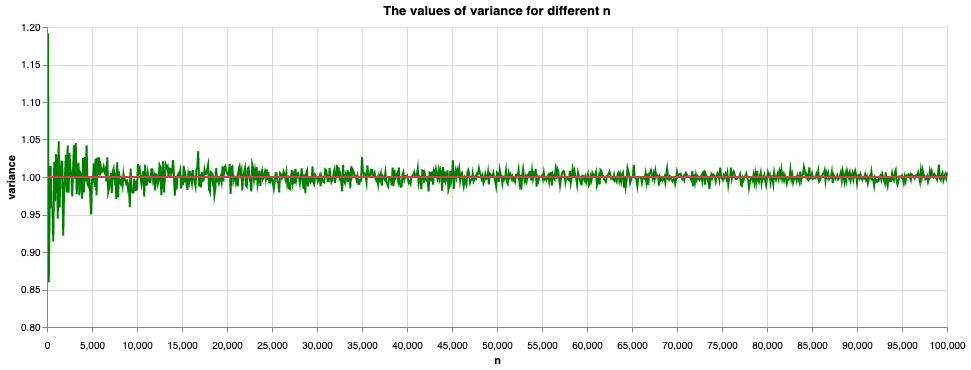

In [15]:
new_data['1 value'] = [1]*len(list_of_n_all_values)

line = alt.Chart(new_data).mark_line(color="green").encode(
    x=alt.X('n:Q', ),
    y=alt.Y('variance:Q',title ="variance", scale = alt.Scale(domain=[0.85,1.2])),
    tooltip = alt.Tooltip(['n:O', 'variance:Q'])
    
)

line2 = alt.Chart(new_data).mark_line(color='#d53e4f').encode(
    x=alt.X('n:Q', ),
    y=alt.Y('1 value:Q',title ="", scale = alt.Scale( domain=[0.8,1.05]))
)

alt.layer(line + line2).configure_axisX(
    labelAngle=0,
    labelPadding=8
).properties(width=900, title="The values of variance for different n")

As we can see from the plot - estimated variances goes to theoratical variance with increasing n

<b>Consistency:</b>

$$P(|\hat{\Theta}_n - \theta|\geq c)_{n	\rightarrow \infty}\longrightarrow 0~~~~\forall c>0$$

So in my own words consistency: 

The <b>probability</b> - that the module of difference between theoretical and estimated parameter is greater that some constant $c>0$ - goes to $0$ with increasing of n

# Task 2

2. The objective of this part is to get a better feeling for the ML estimation procedures. The estimation for non-standard distributions/models usually follows the maximum- likelihood principle. The t-distribution is a popular alternative if the sample distribu- tion is symmetric, but exhibits heavier tails compared to the normal distribution.

(a) Let x1,...,xn be a given sample. We assume that it stems from a t-distribution with an unknown number of degrees of freedom. Write down the corresponding log-likelihood function. The density function of the $t_{df}$ -distribution is given by<br><br>
$$f(x) = \frac{(1+\frac{x^2}{df})^{- \frac{df+1}{2}}}{B(\frac{df}{2},\frac{1}{2})\sqrt{df}}$$
<br>where $B(·, ·)$ is the beta function $(beta(a,b)$ in $R.)$

<b>Likelihood function:</b>

$$L_{df}(x_1,x_1,...,x_n)=\prod_{i=1}^{n} f(x_i)= \prod_{i=1}^{n}(\frac{(1+\frac{x_i^2}{df})^{- \frac{df+1}{2}}}{B(\frac{df}{2},\frac{1}{2})\sqrt{df}})= \frac{(\prod_{i=1}^{n}(1+\frac{x_i^2}{df}))^{- \frac{df+1}{2}}  }{(B(\frac{df}{2},\frac{1}{2})\sqrt{df})^n}$$

<b>Log-Likelihood function:</b>

$$lnL_{df}(x_1,x_1,...,x_n)=ln \frac{(\prod_{i=1}^{n}(1+\frac{x_i^2}{df}))^{- \frac{df+1}{2}}  }{(B(\frac{df}{2},\frac{1}{2})\sqrt{df})^n}=- \frac{df+1}{2}\cdot\sum_{i=1}^{n}ln(1+\frac{x_i^2}{df}) - n\cdot ln((B(\frac{df}{2},\frac{1}{2})\sqrt{df})$$

Or simpler

$$lnL_{df}(x_1,x_1,...,x_n)=\sum_{i=1}^{n}ln(\frac{(1+\frac{x_i^2}{df})^{- \frac{df+1}{2}}}{B(\frac{df}{2},\frac{1}{2})\sqrt{df}})= \sum_{i=1}^{n}ln(f(x_i))$$

In [72]:
def f(x,df):
    return (np.power(1+np.power(x,2)/df, -(df+1)/2.))/(scipy.special.beta(df/2., 0.5)*np.sqrt(df))

def LogLikelihood(df,x):
    return np.sum(np.log(f(x,df)))

(b) Simulate a sample of size $n = 100$ from $t_5$. Maximize the log-likelihood function (numerically) for the given sample and obtain the ML estimator of the number of degrees of freedom. Compare the estimator with the true value.

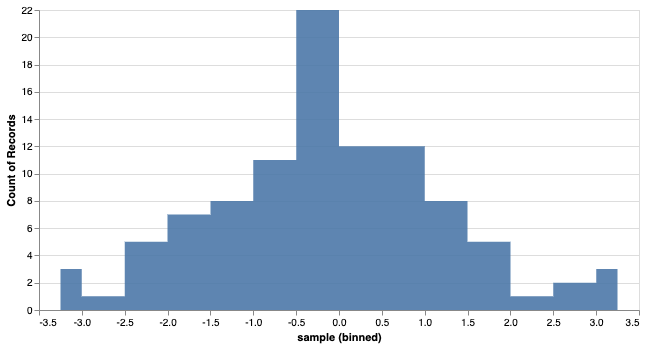

In [84]:
import scipy.stats as sts

n=100
sample = sts.t.rvs(df=5, size=n)

source = pd.DataFrame({'sample': sample})

alt.Chart(source).mark_area(
    opacity=0.9,
    interpolate='step'
).encode(
    alt.X('sample:Q',bin=alt.Bin(maxbins=25)),
    alt.Y('count()')
).properties(width=600)

! Standart Python realization have optimization only for minimization problem, so for maximization we should change sign of output

In [85]:
def LL_for_optimize(df, x=sample):
    return - LogLikelihood(df,x)

In [86]:
LogLikelihood(df=5, x=sample)

-176.004451525174

In [87]:
LL_for_optimize(df=5, x=sample)

176.004451525174

In [88]:
scipy.optimize.minimize(LL_for_optimize, [5])

      fun: 175.86726159327674
 hess_inv: array([[2.03316107]])
      jac: array([-9.53674316e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([4.1537314])

$\Rightarrow$Estimator gives value 4, but true value is 5

(c) Increase the sample to $n = 5000$ and compare the new estimator with the true value. Which property of the estimator we expect to observe?

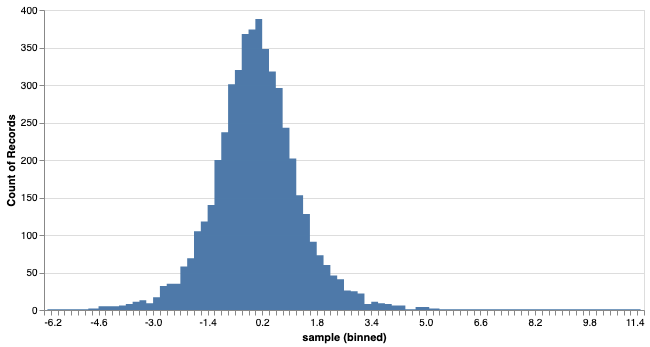

In [108]:
n=5000

new_sample = sts.t.rvs(df=5, size=n)

source = pd.DataFrame({'sample': new_sample})

alt.Chart(source).mark_area(
    opacity=0.99,
    interpolate='step'
).encode(
    alt.X('sample:Q',bin=alt.Bin(maxbins=100)),
    alt.Y('count()')
).properties(width=600)

In [109]:
def LL_for_optimize(df, x=new_sample):
    return - LogLikelihood(df,x)

In [110]:
scipy.optimize.minimize(LL_for_optimize, [5])

      fun: 8150.883943711788
 hess_inv: array([[0.13228558]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([4.97154345])

For $n=5000$ estimator gives value $5$ which is true value

# Task 3 

3. Next we assess the asymptotic distribution of estimators (in the sense of the central limit theorem).

(a) Simulate $b = 1000$ samples of size $n = 100$ from a $χ2$ distribution with mean 1 and variance $1$. For each sample estimate the mean, the variance and keep them. Plot the histogram for one of the sample, so that you get a better feeling how the original distribution looks like.

Simulating samples

In [24]:
b=1000
n=100
df =2

samples = []

for i in range(b):
    sample = sts.chi2.rvs(df, size=n)
    samples.append(sample)

### Before rescaling

In [25]:
mean = np.array(samples).mean()
mean

2.0104561821539986

In [26]:
variance = np.array(samples).var()
variance

4.005145555992114

### Rescaling

$$z = \frac{x- \mu}{\sigma}$$

In [27]:
rescaled_samples = (np.array(samples) - mean)/np.sqrt(variance) + 1

### After rescaling

In [28]:
rescaled_samples.mean()

1.0

In [29]:
rescaled_samples.var()

1.0000000000000002

### Calculating means and variances

In [30]:
means = []
variances = []

for i in range(b):
    means.append(rescaled_samples[i].mean())
    variances.append(rescaled_samples[i].var())

In [31]:
data = pd.DataFrame({'mean':means, 'variance': variances})
data.transpose()

0         1         2         3         4         5    \
mean      1.321141  1.027553  1.210597  0.981753  0.792069  0.909471   
variance  1.486460  1.008737  1.565620  0.862202  0.658626  1.019371   

               6         7         8         9    ...       990       991  \
mean      1.074983  0.969907  0.949738  0.942579  ...  0.947309  0.959567   
variance  1.109649  0.712182  0.835686  0.928579  ...  0.614505  1.170818   

               992       993       994       995       996       997  \
mean      0.879009  1.102843  0.850134  1.043932  0.992366  0.961244   
variance  1.007849  1.083172  0.590269  0.927608  0.769390  0.770012   

               998       999  
mean      0.880515  0.947912  
variance  1.100516  1.058362  

[2 rows x 1000 columns]

### Show distribution of one sample

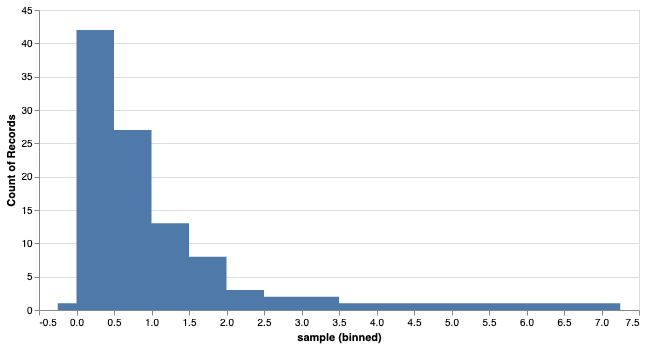

In [32]:
sample = rescaled_samples[5]

source = pd.DataFrame({'sample': sample})
alt.Chart(source).mark_area(
    opacity=0.99,
    interpolate='step'
).encode(
    alt.X('sample:Q',bin=alt.Bin(maxbins=20)),
    alt.Y('count()')
).properties(width=600)

(b) Plot the KDE or a histogram for the sample of means and the sample of variances. Add the density of the normal distribution for comparison purposes. Compare the density estimator with the normal density. What do you expect and why (statistical reasoning!)?

In [33]:
# mu = 1 
# sigma = 0.25

mu = np.array(means).mean()
sigma = np.array(means).std()

normal_distribution = np.random.normal(mu, sigma, b)

In [34]:
data['normal_d'] = normal_distribution
data.transpose()

0         1         2         3         4         5    \
mean      1.321141  1.027553  1.210597  0.981753  0.792069  0.909471   
variance  1.486460  1.008737  1.565620  0.862202  0.658626  1.019371   
normal_d  1.111728  0.854306  1.119037  0.977427  0.935208  0.892899   

               6         7         8         9    ...       990       991  \
mean      1.074983  0.969907  0.949738  0.942579  ...  0.947309  0.959567   
variance  1.109649  0.712182  0.835686  0.928579  ...  0.614505  1.170818   
normal_d  0.968921  1.227825  1.112867  0.905111  ...  0.807830  0.981726   

               992       993       994       995       996       997  \
mean      0.879009  1.102843  0.850134  1.043932  0.992366  0.961244   
variance  1.007849  1.083172  0.590269  0.927608  0.769390  0.770012   
normal_d  1.059308  1.042269  0.882862  0.964786  0.717744  0.991716   

               998       999  
mean      0.880515  0.947912  
variance  1.100516  1.058362  
normal_d  0.893616  0.957783  

[3 rows x 1000 columns]

In [35]:
#ax = data['mean'].plot.kde()
#ax = pd.Series(normal_distribution).plot.kde()

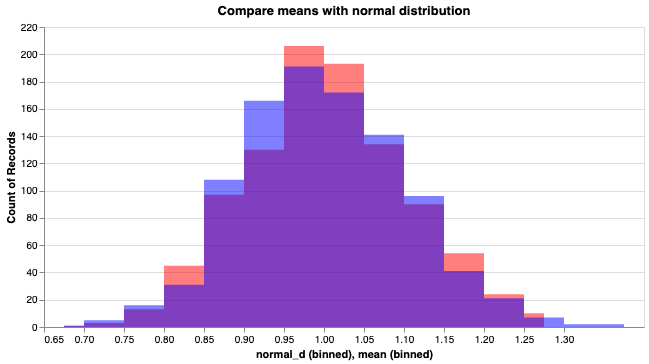

In [36]:
means_plot = alt.Chart(data).mark_area(
    color="blue",
    opacity=0.5,
    interpolate='step'
).encode(
    alt.X('mean:Q',bin=alt.Bin(maxbins=20)),
    alt.Y('count()')
)

normal_dist_plot = alt.Chart(data).mark_area(
    color="red",
    opacity=0.5,
    interpolate='step'
).encode(
    alt.X('normal_d:Q',bin=alt.Bin(maxbins=20)),
    alt.Y('count()')
)

alt.layer(normal_dist_plot+means_plot).properties(width=600, title="Compare means with normal distribution")

##### Blue color - the distribution of mean values
##### Red color - the normal distribution

In [37]:
mu = np.array(variances).mean()
sigma = np.array(variances).std()

normal_distribution = np.random.normal(mu, sigma, b)
data['normal_d'] = normal_distribution
data.transpose()

0         1         2         3         4         5    \
mean      1.321141  1.027553  1.210597  0.981753  0.792069  0.909471   
variance  1.486460  1.008737  1.565620  0.862202  0.658626  1.019371   
normal_d  0.645568  1.066935  1.150293  0.966610  0.818216  1.038137   

               6         7         8         9    ...       990       991  \
mean      1.074983  0.969907  0.949738  0.942579  ...  0.947309  0.959567   
variance  1.109649  0.712182  0.835686  0.928579  ...  0.614505  1.170818   
normal_d  0.613519  0.970251  1.337804  0.626523  ...  1.370785  1.118960   

               992       993       994       995       996       997  \
mean      0.879009  1.102843  0.850134  1.043932  0.992366  0.961244   
variance  1.007849  1.083172  0.590269  0.927608  0.769390  0.770012   
normal_d  1.240413  1.333458  0.995028  0.576097  1.179611  1.133439   

               998       999  
mean      0.880515  0.947912  
variance  1.100516  1.058362  
normal_d  1.366989  1.425413  

[3 rows x 1000 columns]

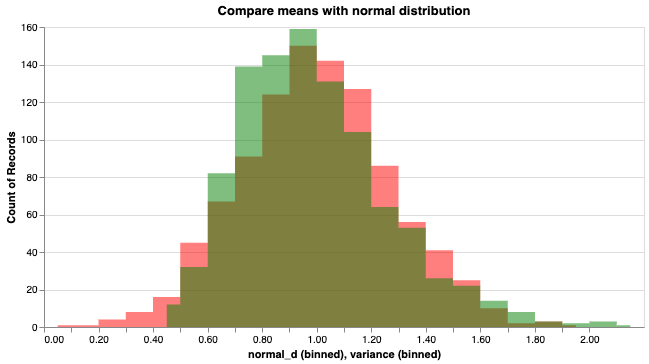

In [38]:
variance_plot = alt.Chart(data).mark_area(
    color="green",
    opacity=0.5,
    interpolate='step'
).encode(
    alt.X('variance:Q',bin=alt.Bin(maxbins=20)),
    alt.Y('count()')
)

normal_dist_plot = alt.Chart(data).mark_area(
    color="red",
    opacity=0.5,
    interpolate='step'
).encode(
    alt.X('normal_d:Q',bin=alt.Bin(maxbins=20)),
    alt.Y('count()')
)

alt.layer(normal_dist_plot+variance_plot).properties(width=600, title="Compare means with normal distribution")

##### Green color - the distribution of variance values
##### Red color - the normal distribution

(c) In the lecture we discussed the CLT (Central Limit Theorem) for the sample mean. Here it seems to apply to the sample variance too. Why?

<b>Central Limit Theorem:</b>

$\sqrt{n} \frac{\bar{X}- \mu}{\sigma}_{n \rightarrow \infty} \longrightarrow N(0, 1) $

For variance I have found and understood similar proof, that is described on this <a href="https://math.stackexchange.com/questions/2325500/central-limit-theorem-for-the-variance#mjx-eqn-1">page</a>

(d) Let $n$ take values $10^3,10^4,10^5$ and $10^6$. Check the impact of $n$ on the results. Can the statement of the CLT be confirmed?

## n=1 000

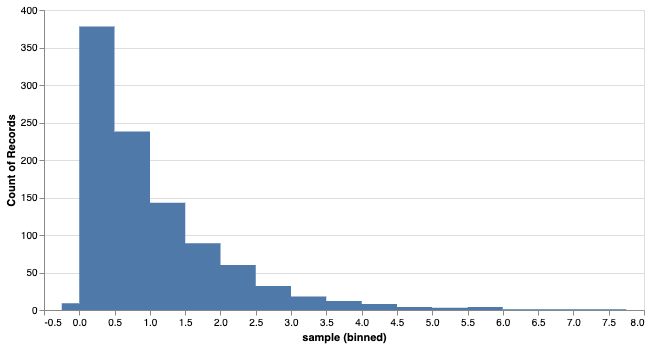

In [39]:
b=1000
df=2
n=1000

samples = []
for i in range(b):
    sample = sts.chi2.rvs(df, size=n)
    samples.append(sample)

rescaled_samples = (np.array(samples) - mean)/np.sqrt(variance) + 1
means = []
variances = []

for i in range(b):
    means.append(rescaled_samples[i].mean())
    variances.append(rescaled_samples[i].var())
    
sample = rescaled_samples[5]

means = []
variances = []
for i in range(b):
    means.append(rescaled_samples[i].mean())
    variances.append(rescaled_samples[i].var())


source = pd.DataFrame({'sample': sample})
alt.Chart(source).mark_area(
    opacity=0.99,
    interpolate='step'
).encode(
    alt.X('sample:Q',bin=alt.Bin(maxbins=20)),
    alt.Y('count()')
).properties(width=600)

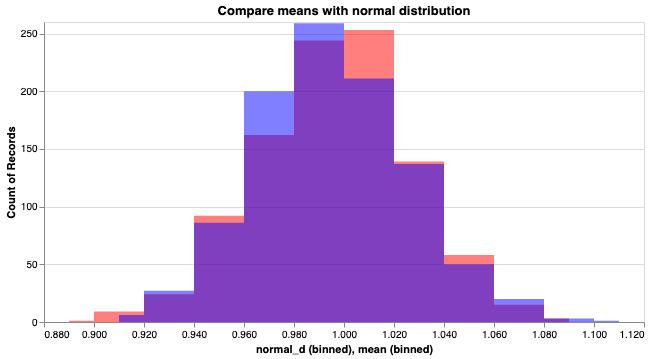

In [40]:
mu = np.array(means).mean()
sigma = np.array(means).std()
normal_distribution = np.random.normal(mu, sigma, b)

data = pd.DataFrame({'mean':means, 'variance': variances})
data['normal_d'] = normal_distribution

means_plot = alt.Chart(data).mark_area(
    color="blue",
    opacity=0.5,
    interpolate='step'
).encode(
    alt.X('mean:Q',bin=alt.Bin(maxbins=20)),
    alt.Y('count()')
)

normal_dist_plot = alt.Chart(data).mark_area(
    color="red",
    opacity=0.5,
    interpolate='step'
).encode(
    alt.X('normal_d:Q',bin=alt.Bin(maxbins=20)),
    alt.Y('count()')
)

alt.layer(normal_dist_plot+means_plot).properties(width=600, title="Compare means with normal distribution")

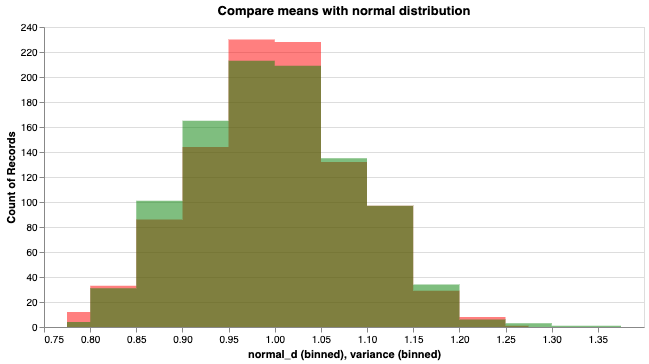

In [41]:
mu = np.array(variances).mean()
sigma = np.array(variances).std()

normal_distribution = np.random.normal(mu, sigma, b)
data['normal_d'] = normal_distribution

variance_plot = alt.Chart(data).mark_area(
    color="green",
    opacity=0.5,
    interpolate='step'
).encode(
    alt.X('variance:Q',bin=alt.Bin(maxbins=20)),
    alt.Y('count()')
)

normal_dist_plot = alt.Chart(data).mark_area(
    color="red",
    opacity=0.5,
    interpolate='step'
).encode(
    alt.X('normal_d:Q',bin=alt.Bin(maxbins=20)),
    alt.Y('count()')
)

alt.layer(normal_dist_plot+variance_plot).properties(width=600, title="Compare means with normal distribution")

## n=10 000

In [42]:
alt.data_transformers.enable('default', max_rows=None) 

DataTransformerRegistry.enable('default')

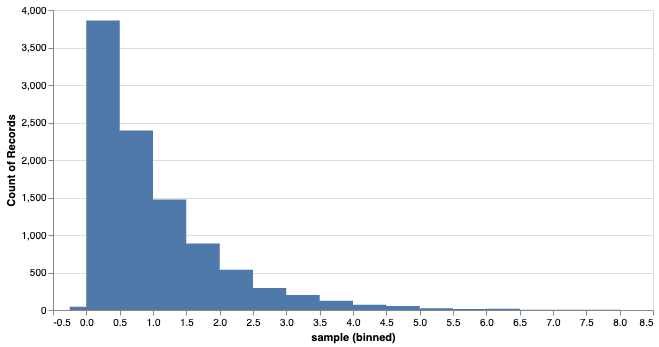

In [43]:
b=1000
df=2
n=10000

samples = []
for i in range(b):
    sample = sts.chi2.rvs(df, size=n)
    samples.append(sample)

rescaled_samples = (np.array(samples) - mean)/np.sqrt(variance) + 1
means = []
variances = []

for i in range(b):
    means.append(rescaled_samples[i].mean())
    variances.append(rescaled_samples[i].var())
    
sample = rescaled_samples[5]

means = []
variances = []
for i in range(b):
    means.append(rescaled_samples[i].mean())
    variances.append(rescaled_samples[i].var())


source = pd.DataFrame({'sample': sample})
alt.Chart(source).mark_area(
    opacity=0.99,
    interpolate='step'
).encode(
    alt.X('sample:Q',bin=alt.Bin(maxbins=20)),
    alt.Y('count()')
).properties(width=600)

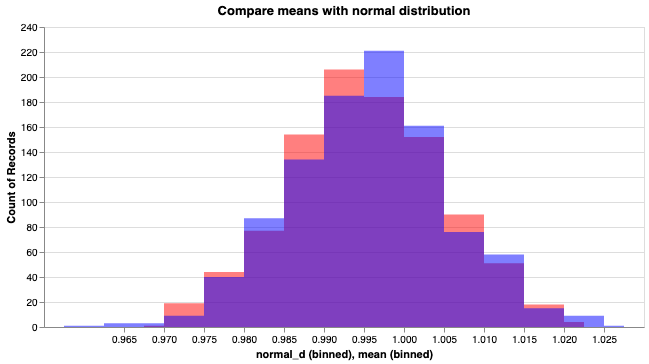

In [44]:
mu = np.array(means).mean()
sigma = np.array(means).std()
normal_distribution = np.random.normal(mu, sigma, b)

data = pd.DataFrame({'mean':means, 'variance': variances})
data['normal_d'] = normal_distribution

means_plot = alt.Chart(data).mark_area(
    color="blue",
    opacity=0.5,
    interpolate='step'
).encode(
    alt.X('mean:Q',bin=alt.Bin(maxbins=20)),
    alt.Y('count()')
)

normal_dist_plot = alt.Chart(data).mark_area(
    color="red",
    opacity=0.5,
    interpolate='step'
).encode(
    alt.X('normal_d:Q',bin=alt.Bin(maxbins=20)),
    alt.Y('count()')
)

alt.layer(normal_dist_plot+means_plot).properties(width=600, title="Compare means with normal distribution")

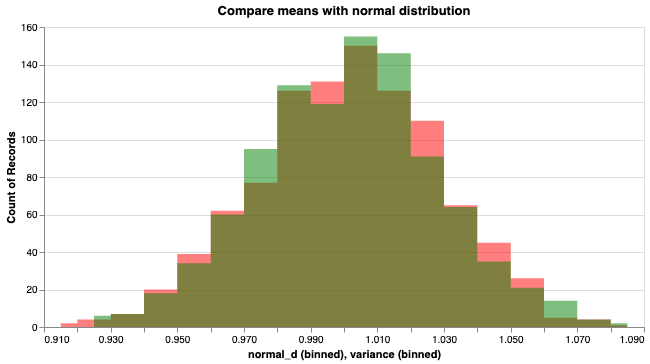

In [45]:
mu = np.array(variances).mean()
sigma = np.array(variances).std()

normal_distribution = np.random.normal(mu, sigma, b)
data['normal_d'] = normal_distribution

variance_plot = alt.Chart(data).mark_area(
    color="green",
    opacity=0.5,
    interpolate='step'
).encode(
    alt.X('variance:Q',bin=alt.Bin(maxbins=20)),
    alt.Y('count()')
)

normal_dist_plot = alt.Chart(data).mark_area(
    color="red",
    opacity=0.5,
    interpolate='step'
).encode(
    alt.X('normal_d:Q',bin=alt.Bin(maxbins=20)),
    alt.Y('count()')
)

alt.layer(normal_dist_plot+variance_plot).properties(width=600, title="Compare means with normal distribution")

## n=100 000

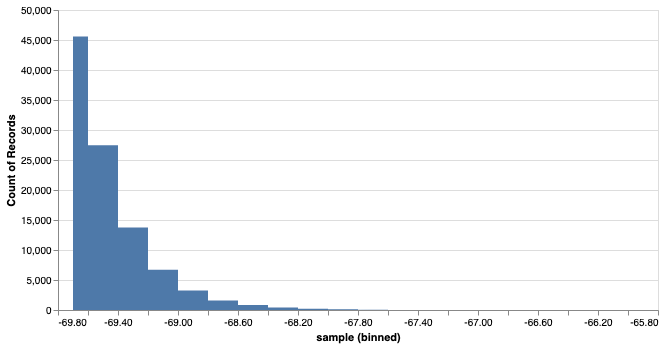

In [111]:
b=1000
df=2
n=100000

samples = []
for i in range(b):
    sample = sts.chi2.rvs(df, size=n)
    samples.append(sample)

rescaled_samples = (np.array(samples) - mean)/np.sqrt(variance) + 1
means = []
variances = []

for i in range(b):
    means.append(rescaled_samples[i].mean())
    variances.append(rescaled_samples[i].var())
    
sample = rescaled_samples[5]

means = []
variances = []
for i in range(b):
    means.append(rescaled_samples[i].mean())
    variances.append(rescaled_samples[i].var())


source = pd.DataFrame({'sample': sample})
alt.Chart(source).mark_area(
    opacity=0.99,
    interpolate='step'
).encode(
    alt.X('sample:Q',bin=alt.Bin(maxbins=20)),
    alt.Y('count()')
).properties(width=600)

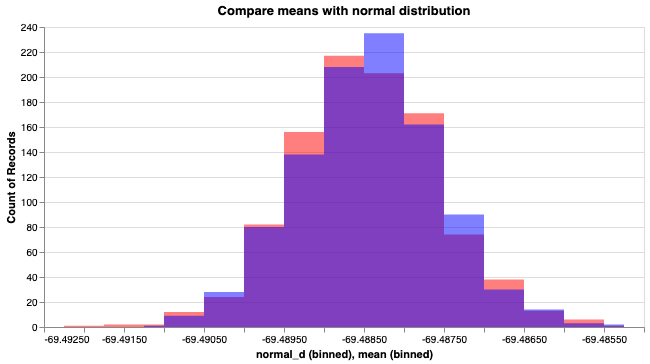

In [112]:
mu = np.array(means).mean()
sigma = np.array(means).std()
normal_distribution = np.random.normal(mu, sigma, b)

data = pd.DataFrame({'mean':means, 'variance': variances})
data['normal_d'] = normal_distribution

means_plot = alt.Chart(data).mark_area(
    color="blue",
    opacity=0.5,
    interpolate='step'
).encode(
    alt.X('mean:Q',bin=alt.Bin(maxbins=20)),
    alt.Y('count()')
)

normal_dist_plot = alt.Chart(data).mark_area(
    color="red",
    opacity=0.5,
    interpolate='step'
).encode(
    alt.X('normal_d:Q',bin=alt.Bin(maxbins=20)),
    alt.Y('count()')
)

alt.layer(normal_dist_plot+means_plot).properties(width=600, title="Compare means with normal distribution")

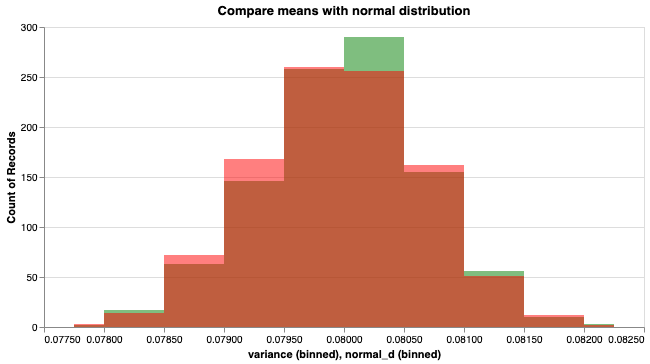

In [113]:
mu = np.array(variances).mean()
sigma = np.array(variances).std()
normal_distribution = np.random.normal(mu, sigma, b)
data['normal_d'] = normal_distribution

variance_plot = alt.Chart(data).mark_area(
    color="green",
    opacity=0.5,
    interpolate='step'
).encode(
    alt.X('variance:Q',bin=alt.Bin(maxbins=20)),
    alt.Y('count()')
)

normal_dist_plot = alt.Chart(data).mark_area(
    color="red",
    opacity=0.5,
    interpolate='step'
).encode(
    alt.X('normal_d:Q',bin=alt.Bin(maxbins=20)),
    alt.Y('count()')
)

alt.layer(variance_plot + normal_dist_plot).properties(width=600, title="Compare means with normal distribution")
#normal_dist_plot 

As we see, with increasing n the distribution of means and distribution of variances better approximates with normal distribution

# Task 4

4. The next aim objective is check if the probability of type $1$ error (size of a test) is correctly attained by a simple two-sided test for the mean.

(a) Simulate a sample of length $n = 100$ from a normal distribution with mean $μ_0 = 500$ and variance $σ^2 = 50$. (Note: you may use the transformation $X = μ + σZ$, where $Z ∼ N(0,1)$.) The objective is to test the null hypothesis $H_0 : μ = 500$. Assume that $σ^2$ has to be estimated. Compute the test statistics using the formulas in the lecture; determine the rejection area for $α = 0.04$ and decide if $H_0$ can to be rejected.

In [50]:
import scipy.stats as sts

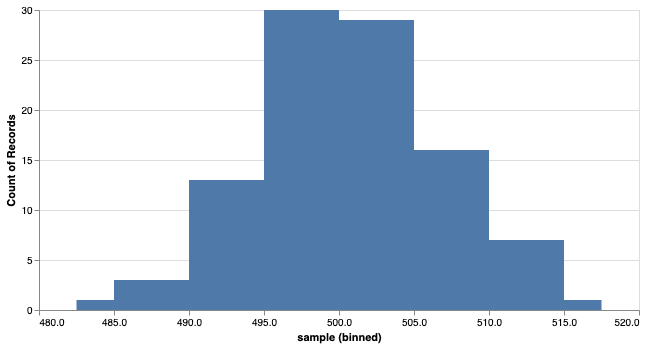

In [51]:
np.random.seed(1)

n=100
mu = 500
variance = 50
sigma = np.sqrt(variance)

normal_distribution = np.random.normal(mu, sigma, n)

source = pd.DataFrame({'sample': normal_distribution})
alt.Chart(source).mark_area(
    opacity=0.99,
    interpolate='step'
).encode(
    alt.X('sample:Q',bin=alt.Bin(maxbins=10)),
    alt.Y('count()')
).properties(width=600)

Two-sided test

$H_0: \mu_0=500$

$H_1: \mu_0 \neq 500$

$X \sim N(\mu, \sigma^2)$ - we know that our sample from normal distribution

$\sigma^2$ -  estimated by $s^2 \Rightarrow$ $\sigma^2$ - unknown $\Rightarrow$ we should use $V=\sqrt{n}\frac{\bar{X}-\mu_0}{s} \sim t_{n-1}$ statistics

In [52]:
mean = normal_distribution.mean()
mean 

500.4283854552635

In [53]:
std = normal_distribution.std() 
std

6.258999612097237

In [54]:
v = np.sqrt(n)*(mean - mu)/std
v

0.6844311899868281

$H_0$ is rejected if $|v|>z_{1-\frac{\alpha}{2}}$

$\alpha = 0.04~~\Rightarrow 1-\frac{\alpha}{2} = 0.98$ 

In [55]:
Z_1_alfa2 = sts.norm.ppf(0.98)
Z_1_alfa2

2.0537489106318225

In [56]:
np.abs(v) > Z_1_alfa2

False

$\Rightarrow |v| \ngtr z_{1-\frac{\alpha}{2}}\Rightarrow~~ H_0$ is <b>not</b> rejected

(b) Determine the $p$-values using the formulas from the lecture and compare/check the results using a build-in function for this test in R or Python. Give a verbal interpretation of the obtained $p$-value.

$p$-value is the largest level of significance for which $H_0$ is still not rejected

The smaller the $p$-value is, the more evidence the sample contains against $H_0$

$\alpha > p \Rightarrow H_0$ rejected

$\alpha \leq p \Rightarrow H_0$ not rejected

Case: two-sided T-test

$F_{St_{n-1}}(v) = \frac{p}{2}$ if $v<0$

$F_{St_{n-1}}(v) = 1 - \frac{p}{2}$ if $v>0$

$\Rightarrow p=2(1 - F_{St(n-1)}(|v|))~~$ if $~~H_1: \mu \neq \mu_0$

In [57]:
p = 2*(1- sts.t.cdf(np.abs(v),n-1))

print('T-statistics: ',v)
print('\np-value: ', p)

T-statistics:  0.6844311899868281

p-value:  0.49530207154877726


$\alpha = 0.04$

$\alpha \leq p \Rightarrow H_0$ not rejected

#### check the results using a build-in function for this test in Python

In [58]:
sts.ttest_1samp(normal_distribution, mu)

Ttest_1sampResult(statistic=0.6810004356008281, pvalue=0.4974609984410544)

In [59]:
v_val, p_val = sts.ttest_1samp(normal_distribution, mu)

print('T-statistics: ',v_val)
print('\np-value: ', p_val)

T-statistics:  0.6810004356008281

p-value:  0.4974609984410544


As we see, p-values are almost the same

(c) Simulate $M = 1000$ samples of size $n = 100$ and with $μ_0 = 500$ and variance $σ^2 = 50$. 

For each sample $i$ run the test (using a standard function) and set $p_i = 0$ if $H_0$ is not rejected and $p_i = 1$ is rejected. Compute $\hat{α} = \frac{1}{M}\sum_{i=1}^M p_i$. 

$\hat{α}$ is the empirical confidence level (empirical size) of the test. Compare $\hat{α}$ with $α$. Do you expect the difference to be large or small and why? Relate it to the assumptions of the test.

<b>My assumption</b>: they should be the same

$\hat{α}$ is a estimated value of theoretical value $\alpha$ 

$\alpha$ is the probability to make error of the 1st type

$P(\{H_1\}|H_0) = \alpha$

So we will count how often we make error of the 1st type

In [60]:
M=1000

n=100
mu = 500
variance = 50
sigma = np.sqrt(variance)

alpha = 0.04

np.random.seed(4)

samples = [np.random.normal(mu, sigma, n) for i in range(M)]

results = []

for sample in samples:
    v, p_val = sts.ttest_1samp(sample, mu)
    if alpha > p_val:
        results.append(1)
    else:
        results.append(0)
        
alpa_hat = 1./M * sum(results)
alpa_hat

0.039

As we see - $\hat{α}$ is almost the same as $α$

(d) Assume now that one of the assumptions is not satisfied. For example, the data is in fact not normal. Repeat the above analysis, but simulate a sample $z_1,...,z_n$ from $t$-distribution with 3 degrees of freedom. Compute $x_i = 500 + \sqrt{50}\cdot\frac{z_i}{\sqrt{3}}$. <br>(Note: This will guarantee the same expectation and the same variance as the above normal distribution.) Recompute a new
hatα. What do you expect? Relate your answer to the type one error and the underlying assumptions.

After such rescaling our samples from students distribution become very similar to normal distributions with parameters $\mu = 500$ and $\sigma^2=50$

That's why our estimated value $\hat{α}$ should be also the same $α$, or maybe with small difference

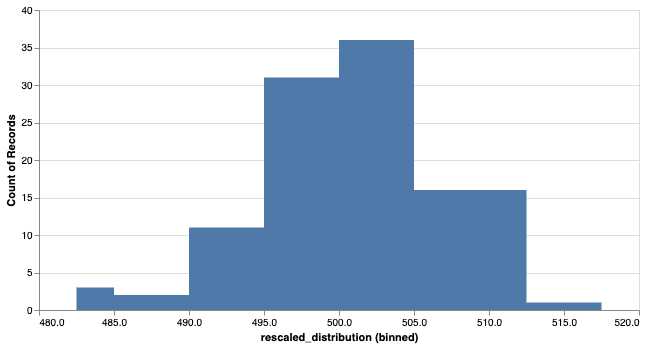

In [61]:
np.random.seed(0)

n=100
mu = 500
variance = 50
sigma = np.sqrt(variance)

t_distribution = sts.t.rvs(df=3, size=n)

rescaled_distribution = 500 + np.sqrt(50/3)*t_distribution

source = pd.DataFrame({'rescaled_distribution': rescaled_distribution})
alt.Chart(source).mark_area(
    opacity=0.99,
    interpolate='step'
).encode(
    alt.X('rescaled_distribution:Q',bin=alt.Bin(maxbins=10)),
    alt.Y('count()')
).properties(width=600)

In [62]:
M=1000

n=100
mu = 500
variance = 50
sigma = np.sqrt(variance)

alpha = 0.04

samples = [sts.t.rvs(df=3, size=n) for i in range(M)]
rescaled_samples = 500 + np.sqrt(50/3)*np.array(samples)

results = []

for sample in rescaled_samples:
    v, p_val = sts.ttest_1samp(sample, mu)
    if alpha > p_val:
        results.append(1)
    else:
        results.append(0)
        
alpa_hat = 1./M * sum(results)
alpa_hat

0.038

As we see - $\hat{α}$ and $α$ are very simmilar

(e) <b>Power of a test</b>: The first objective is to assess the probability of type 2 error (power of a test) of goodness-of-fit test. Goodness-of-fit tests for the normal distribution are of key importance in statistics, since they allow to verify the distributional assumptions required in many models. Here we check the power of the Kolmogorov-Smirnov test, i.e. is the test capable to detect deviations from normality?

Simulate $M = 1000$ samples of size $100$ from a $t$-distribution with $df = 2,....,50$ degrees of freedom. For each sample run the Kolmogorov-Smirnov test and count the cases when the $H_0$ of normality is correctly rejected (for each df). How would you use this quantity to estimate the power of the test? Make an appropriate plot with the df on the X-axis. (Note: the $t$-distribution converges to the normal distribution as $df$ tends to infinity. For $df > 50$ the distributions are almost identical.) Discuss the plot and draw conclusions about the reliability of the test.

Let $\alpha=0.05$

In [63]:
M=1000
n=100

alpha = 0.05

result_sums = []

for df in range(2, 51):
    samples = [sts.t.rvs(df=df, size=n) for i in range(M)]
    sum_of_rejected = 0
    for sample in samples:
        statistics_value, p_value = sts.kstest(sample,'norm')
        if alpha > p_value:
            sum_of_rejected += 1
      
    result_sums.append(sum_of_rejected)

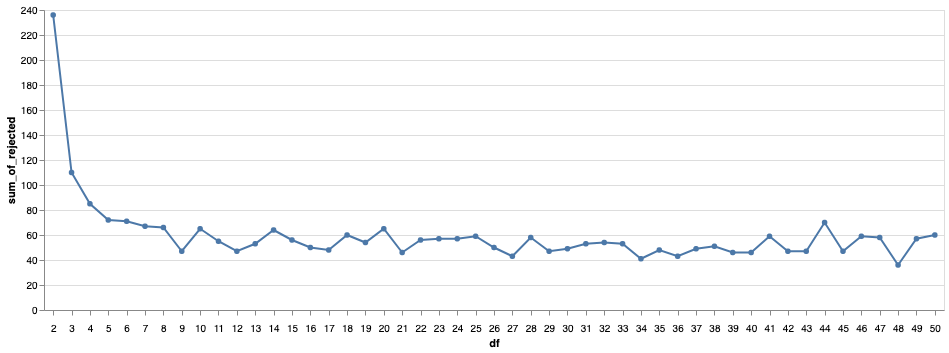

In [64]:
source = pd.DataFrame({'df':list(range(2, 51)), 'sum_of_rejected':result_sums})
line = alt.Chart(source).mark_line(point=True).encode(
    x='df:O',
    y='sum_of_rejected:Q',
    tooltip = alt.Tooltip(['df:O', 'sum_of_rejected:Q'])
)

line.properties(width=900).configure_axisX(
    labelAngle=0,
    labelPadding=8
)

<b>Power of the test = </b> $1-\beta$

$\beta$ - is a probability to make error of the 2nd 

In our case - (not reject $H_0$ - that distribution is normal when distribution is not normal)

For small values of df our distributions are very unlike from normal distribution - that's why power is bigger

For big values of df our distributions look like normal distribution - that's why power of test is small

So this plot shows trend how changes power of test for differnt df - degrees of freedom